<a href="https://colab.research.google.com/github/TranNgocXuanThanh/Gender-detection/blob/main/Copy_of_Genderdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from os import listdir
from sklearn.model_selection import train_test_split
import numpy as np
from numpy import save
from keras.utils import to_categorical, load_img, img_to_array
from keras.models import Sequential,Model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, LeakyReLU, Activation, Dropout
from keras.optimizers import Adam,SGD
import matplotlib.pyplot as plt


# Đường dẫn đến thư mục chứa dữ liệu
folder = '/content/drive/MyDrive/Genderdetection/'

# Khởi tạo danh sách chứa ảnh và nhãn
photos, labels = list(), list()

# Duyệt qua tệp tin trong thư mục
for file in listdir(folder):
    output = None
    if file.startswith('nam'):
        output = 0  # Gán nhãn 0 cho nam
    if file.startswith('nu'):
        output = 1  # Gán nhãn 1 cho nữ
  
    if output is not None:
        photo = load_img(folder + file, target_size=(200, 200))
        photo = img_to_array(photo)
        photos.append(photo)
        labels.append(output)

# Chuyển đổi danh sách ảnh và nhãn sang dạng numpy array
photos = np.array(photos)
labels = np.array(labels)

# Chuẩn hóa ảnh
photos = photos.astype('float32') / 255

# One-hot encode nhãn
labels = to_categorical(labels,2)

# Lưu ảnh và nhãn vào ổ đĩa
save('/content/drive/MyDrive/Genderdetection/photos.npy', photos)
save('/content/drive/MyDrive/Genderdetection/labels.npy', labels)

# Định nghĩa mô hình
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', input_shape=(200, 200, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

#Đọc dữ liệu hình ảnh và nhãn đã được lưu trữ từ tệp tin numpy trước đó
photos = np.load('/content/drive/MyDrive/Genderdetection/photos.npy')
labels = np.load('/content/drive/MyDrive/Genderdetection/labels.npy')

# Chia tập dữ liệu thành tập huấn luyện và tập kiểm thử
train_photos, test_photos, train_labels, test_labes = train_test_split(photos, labels, test_size=0.2, random_state=42)

# Compile mô hình
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình
history = model.fit(photos, labels, batch_size=60, epochs=30, verbose=1)

# Đánh giá mô hình
model.evaluate(photos, labels)

# Đánh giá mô hình trên bộ kiểm tra
test_loss, test_accuracy = model.evaluate(photos, labels)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)



Epoch 1/30
4/4 [==============================] - 27s 2s/step - loss: 14.5697 - accuracy: 0.4460
Epoch 2/30
4/4 [==============================] - 2s 386ms/step - loss: 1.8688 - accuracy: 0.4789
Epoch 3/30
4/4 [==============================] - 2s 380ms/step - loss: 0.6657 - accuracy: 0.6338
Epoch 4/30
4/4 [==============================] - 2s 378ms/step - loss: 0.6202 - accuracy: 0.6808
Epoch 5/30
4/4 [==============================] - 2s 379ms/step - loss: 0.6302 - accuracy: 0.6761
Epoch 6/30
4/4 [==============================] - 2s 377ms/step - loss: 0.6382 - accuracy: 0.6526
Epoch 7/30
4/4 [==============================] - 2s 382ms/step - loss: 0.5716 - accuracy: 0.6714
Epoch 8/30
4/4 [==============================] - 2s 388ms/step - loss: 0.4670 - accuracy: 0.8404
Epoch 9/30
4/4 [==============================] - 2s 380ms/step - loss: 0.4765 - accuracy: 0.7418
Epoch 10/30
4/4 [==============================] - 2s 384ms/step - loss: 0.6153 - accuracy: 0.7606
Epoch 11/30
4/4 [===

In [3]:
model.save('Genderdetection.h5')

In [4]:
classes=['nam','nu']

1/1 [==============================] - 1s 502ms/step
[[0.00379727 0.99620277]]


'nu'

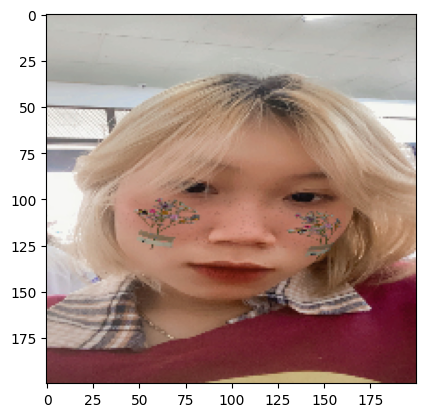

In [5]:

img = load_img('/content/drive/MyDrive/Genderdetection/nu3.jpg', target_size=(200,200))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3) 
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

1/1 [==============================] - 0s 26ms/step
[[1.0000000e+00 3.2103554e-08]]


'nam'

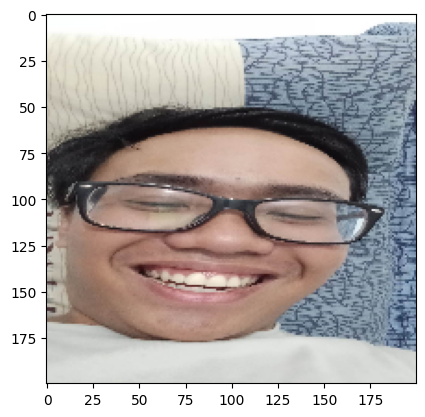

In [6]:
img = load_img('/content/drive/MyDrive/Genderdetection/nam1.jpg', target_size=(200,200))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3) 
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

1/1 [==============================] - 0s 26ms/step
[[9.9958616e-01 4.1390123e-04]]


'nam'

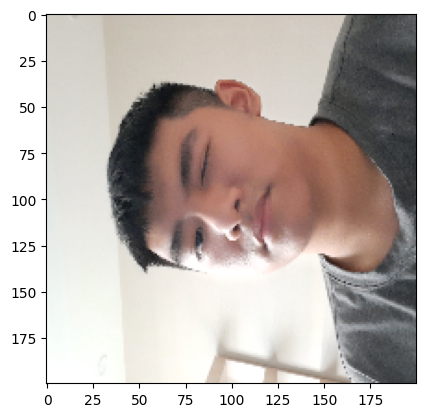

In [7]:
img = load_img('/content/drive/MyDrive/Genderdetection/nam70.jpg', target_size=(200,200))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3) 
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

1/1 [==============================] - 0s 20ms/step
[[0.01326815 0.9867318 ]]


'nu'

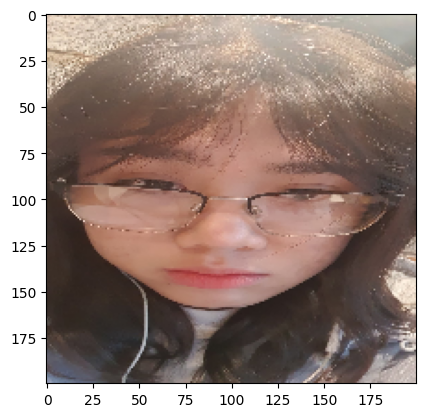

In [8]:
img = load_img('/content/drive/MyDrive/Genderdetection/nu33.jpg', target_size=(200,200))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3) 
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]